# The Dataset

Source: https://data.europa.eu/data/datasets/b839c732-bd4a-480e-8f79-5bd181c2fd05?locale=en

The National Treatment Purchase Fund (NTPF) is responsible for the collection, collation and validation of inpatient, Day Case and Outpatient waiting lists.

The IPDC GI Endoscopy Waiting List Open Data report shows the total number of people waiting, across the various time Bands, for GI Endoscopy treatment.

The NTPF does not collect activity data, i.e., numbers treated or removed. A Snapshot of the number of patients waiting in each hospital is collected and published, monthly, on the NTPF website.

Boards and management of individual public hospitals are responsible for the accuracy and the integrity of patient data submitted to NTPF.




# Import The Data


In [503]:
# Load packages
import pandas as pd
import numpy as np

yr_2020 = pd.read_csv("Files/GI_Endoscopy.csv")
yr_2020.head()

,Archive_Date,Hospital_Group,Hospital_HIPE,Hospital_Name,Specialty_HIPE,Specialty_Name,Case_Type,Adult_Child,Age_Profile,Time_Bands,Total
0,30/01/2020,Children's Health Ireland,0,Children's Health Ireland,1906,Paed Gastro-Enterol,Day Case,Child,0-15,0-3 Months,150
1,30/01/2020,Children's Health Ireland,0,Children's Health Ireland,1906,Paed Gastro-Enterol,Day Case,Child,0-15,3-6 Months,100
2,30/01/2020,Children's Health Ireland,0,Children's Health Ireland,1906,Paed Gastro-Enterol,Day Case,Child,0-15,6-9 Months,30
3,30/01/2020,Children's Health Ireland,0,Children's Health Ireland,1906,Paed Gastro-Enterol,Day Case,Child,0-15,9-12 Months,24
4,30/01/2020,Children's Health Ireland,0,Children's Health Ireland,1906,Paed Gastro-Enterol,Day Case,Child,0-15,12-15 Months,6


# Inspect The Data


In [504]:
yr_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Archive_Date    10014 non-null  object
 1   Hospital_Group  10014 non-null  object
 2   Hospital_HIPE   10014 non-null  int64 
 3   Hospital_Name   10014 non-null  object
 4   Specialty_HIPE  10014 non-null  int64 
 5   Specialty_Name  10014 non-null  object
 6   Case_Type       10014 non-null  object
 7   Adult_Child     10014 non-null  object
 8   Age_Profile     10014 non-null  object
 9   Time_Bands      10014 non-null  object
 10  Total           10014 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 860.7+ KB


In [505]:
yr_2020['Archive_Date'].value_counts()

24/09/2020    926
29/10/2020    923
27/08/2020    907
26/11/2020    902
30/07/2020    890
23/12/2020    888
25/06/2020    879
28/05/2020    859
30/04/2020    813
26/03/2020    724
27/02/2020    660
30/01/2020    643
Name: Archive_Date, dtype: int64

In [506]:
yr_2020['Hospital_Group'].value_counts()

South/South West Hospital Group          2322
Ireland East Hospital Group              2128
Saolta University Health Care Group      1610
Dublin Midlands Hospital Group           1566
University of Limerick Hospital Group    1346
RCSI  Hospitals Group                     792
Children's Health Ireland                 250
Name: Hospital_Group, dtype: int64

In [507]:
yr_2020['Hospital_Name'].value_counts()

Mercy University Hospital                       769
Naas General Hospital                           397
St. James's Hospital                            392
Nenagh Hospital                                 383
Galway University Hospitals                     377
University Hospital Waterford                   371
Tallaght University Hospital                    368
St. Luke's General Hospital Kilkenny            363
Letterkenny University Hospital                 354
St. John's Hospital Limerick                    342
St. Columcille's Hospital                       327
University Hospital Limerick                    322
Mater Misericordiae University Hospital         311
Ennis Hospital                                  299
Mayo University Hospital                        291
Portiuncula University Hospital                 288
University Hospital Kerry                       285
St. Michael's Hospital                          265
Cork University Hospital                        257
Midland Regi

In [508]:
yr_2020['Specialty_Name'].value_counts()

General Surgery              4613
Gastro-Enterology            2501
General Medicine             1677
Gastro-Intestinal Surgery     424
Small Volume Specialities     258
Paed Gastro-Enterol           180
Hepato-Biliary Surgery         85
Paediatrics                    68
Paediatric Surgery             67
Geriatric Medicine             51
Respiratory Medicine           48
Endocrinology                  36
Cardiology                      6
Name: Specialty_Name, dtype: int64

In [509]:
yr_2020['Case_Type'].value_counts()

Day Case     9110
Inpatient     904
Name: Case_Type, dtype: int64

In [510]:
yr_2020['Adult_Child'].value_counts()

Adult    9408
Child     606
Name: Adult_Child, dtype: int64

In [511]:
yr_2020['Age_Profile'].value_counts()

16-64    5000
65+      4487
0-15      527
Name: Age_Profile, dtype: int64

In [512]:
yr_2020['Time_Bands'].value_counts()

  0-3 Months     2417
  3-6 Months     2118
  6-9 Months     1776
  9-12 Months    1377
 12-15 Months    1002
 15-18 Months     713
18+ Months        611
Name: Time_Bands, dtype: int64

# Data Validation

In [513]:
# Remove unnecessary columns

yr_2020 = yr_2020.drop(['Hospital_HIPE', 'Specialty_HIPE'], axis=1)

In [514]:
yr_2020.head()

,Archive_Date,Hospital_Group,Hospital_Name,Specialty_Name,Case_Type,Adult_Child,Age_Profile,Time_Bands,Total
0,30/01/2020,Children's Health Ireland,Children's Health Ireland,Paed Gastro-Enterol,Day Case,Child,0-15,0-3 Months,150
1,30/01/2020,Children's Health Ireland,Children's Health Ireland,Paed Gastro-Enterol,Day Case,Child,0-15,3-6 Months,100
2,30/01/2020,Children's Health Ireland,Children's Health Ireland,Paed Gastro-Enterol,Day Case,Child,0-15,6-9 Months,30
3,30/01/2020,Children's Health Ireland,Children's Health Ireland,Paed Gastro-Enterol,Day Case,Child,0-15,9-12 Months,24
4,30/01/2020,Children's Health Ireland,Children's Health Ireland,Paed Gastro-Enterol,Day Case,Child,0-15,12-15 Months,6


In [515]:
# Check for missing fields

print(yr_2020.isnull().sum())

Archive_Date      0
Hospital_Group    0
Hospital_Name     0
Specialty_Name    0
Case_Type         0
Adult_Child       0
Age_Profile       0
Time_Bands        0
Total             0
dtype: int64


In [516]:
# Check that all fields are the correct type

yr_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Archive_Date    10014 non-null  object
 1   Hospital_Group  10014 non-null  object
 2   Hospital_Name   10014 non-null  object
 3   Specialty_Name  10014 non-null  object
 4   Case_Type       10014 non-null  object
 5   Adult_Child     10014 non-null  object
 6   Age_Profile     10014 non-null  object
 7   Time_Bands      10014 non-null  object
 8   Total           10014 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 704.2+ KB


In [593]:
# Change Archive_Date to a DateTime field

yr_2020['Archive_Date']= pd.to_datetime(yr_2020['Archive_Date'], infer_datetime_format=True)
yr_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Archive_Date    10014 non-null  datetime64[ns]
 1   Hospital_Group  10014 non-null  object        
 2   Hospital_Name   10014 non-null  object        
 3   Specialty_Name  10014 non-null  object        
 4   Case_Type       10014 non-null  object        
 5   Adult_Child     10014 non-null  object        
 6   Age_Profile     10014 non-null  object        
 7   Time_Bands      10014 non-null  object        
 8   Total           10014 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 704.2+ KB


In [518]:
# export csv file to Tableau

yr_2020.to_csv("EndoscopyWaitingList.csv")

# Exploratory Data Analysis

#### 1. Explore the overall change in Waiting Numbers between January and December by Hospital and by Speciality


In [519]:
jan_dec = yr_2020.query("Archive_Date == '30/01/2020' or Archive_Date == '23/12/2020'")
jan_dec.head()


,Archive_Date,Hospital_Group,Hospital_Name,Specialty_Name,Case_Type,Adult_Child,Age_Profile,Time_Bands,Total
0,30/01/2020,Children's Health Ireland,Children's Health Ireland,Paed Gastro-Enterol,Day Case,Child,0-15,0-3 Months,150
1,30/01/2020,Children's Health Ireland,Children's Health Ireland,Paed Gastro-Enterol,Day Case,Child,0-15,3-6 Months,100
2,30/01/2020,Children's Health Ireland,Children's Health Ireland,Paed Gastro-Enterol,Day Case,Child,0-15,6-9 Months,30
3,30/01/2020,Children's Health Ireland,Children's Health Ireland,Paed Gastro-Enterol,Day Case,Child,0-15,9-12 Months,24
4,30/01/2020,Children's Health Ireland,Children's Health Ireland,Paed Gastro-Enterol,Day Case,Child,0-15,12-15 Months,6


In [492]:
jan_dec.tail()

,Archive_Date,Hospital_Group,Hospital_Name,Specialty_Name,Case_Type,Adult_Child,Age_Profile,Time_Bands,Total
10009,23/12/2020,University of Limerick Hospital Group,St. John's Hospital Limerick,General Surgery,Day Case,Adult,65+,9-12 Months,54
10010,23/12/2020,University of Limerick Hospital Group,St. John's Hospital Limerick,General Surgery,Day Case,Adult,65+,12-15 Months,30
10011,23/12/2020,University of Limerick Hospital Group,St. John's Hospital Limerick,General Surgery,Day Case,Adult,65+,15-18 Months,17
10012,23/12/2020,University of Limerick Hospital Group,St. John's Hospital Limerick,General Surgery,Day Case,Adult,65+,18+ Months,13
10013,23/12/2020,University of Limerick Hospital Group,St. John's Hospital Limerick,General Surgery,Inpatient,Adult,16-64,12-15 Months,1


In [493]:
pivot_hospital = pd.pivot_table(jan_dec, values='Total', 
                                index='Hospital_Name', 
                                columns='Archive_Date', 
                                aggfunc=np.sum)
pivot_hospital.head()

Archive_Date,23/12/2020,30/01/2020
Hospital_Name,,
Bantry General Hospital,384,180
Beaumont Hospital,490,186
Cavan General Hospital,310,589
Children's Health Ireland,458,341
Connolly Hospital Blanchardstown,139,487


In [494]:
pivot_hospital['jan-dec'] = pivot_hospital['23/12/2020'] - pivot_hospital['30/01/2020']
pivot_hospital.head()

Archive_Date,23/12/2020,30/01/2020,jan-dec
Hospital_Name,,,
Bantry General Hospital,384,180,204
Beaumont Hospital,490,186,304
Cavan General Hospital,310,589,-279
Children's Health Ireland,458,341,117
Connolly Hospital Blanchardstown,139,487,-348


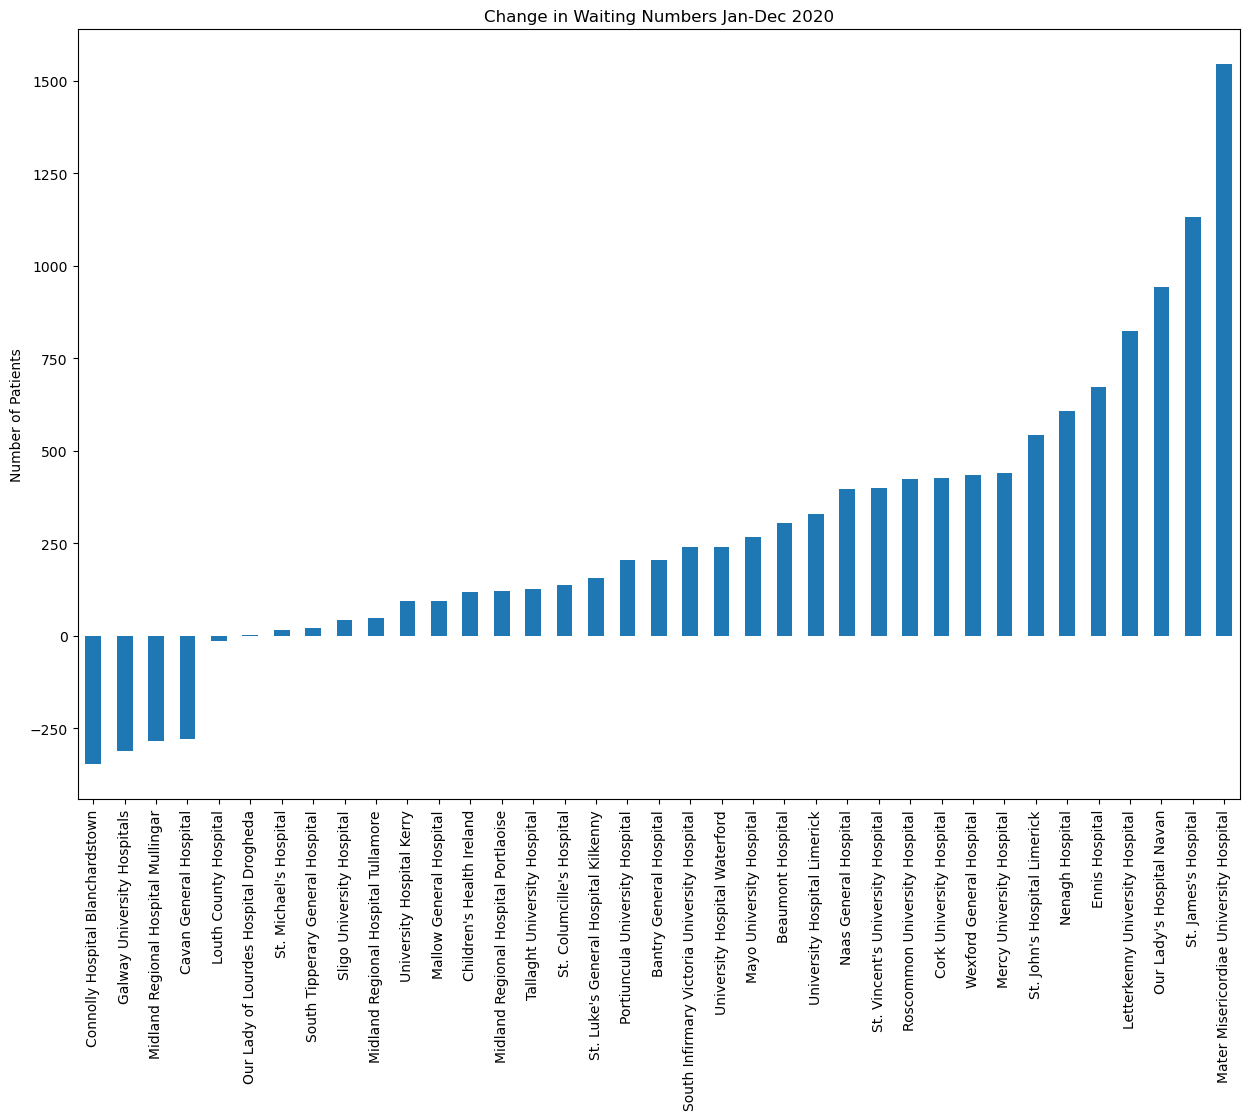

In [495]:
p2 = pivot_hospital.sort_values('jan-dec')

import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

ax = p2['jan-dec'].plot(kind='bar')

# Set the title and axis labels
plt.title('Change in Waiting Numbers Jan-Dec 2020')
plt.xlabel('')
plt.ylabel('Number of Patients')

plt.show()

In [496]:
pivot_speciality = pd.pivot_table(jan_dec, values='Total', 
                                index='Specialty_Name', 
                                columns='Archive_Date', 
                                aggfunc=np.sum)
pivot_speciality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Cardiology to Small Volume Specialities
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   23/12/2020  13 non-null     float64
 1   30/01/2020  10 non-null     float64
dtypes: float64(2)
memory usage: 312.0+ bytes


In [497]:
# Drop NaN values

pivot_speciality = pivot_speciality.dropna()
pivot_speciality

Archive_Date,23/12/2020,30/01/2020
Specialty_Name,,
Gastro-Enterology,11696.0,7471.0
Gastro-Intestinal Surgery,825.0,316.0
General Medicine,3703.0,3493.0
General Surgery,15740.0,10543.0
Geriatric Medicine,9.0,5.0
Hepato-Biliary Surgery,44.0,24.0
Paed Gastro-Enterol,446.0,334.0
Paediatric Surgery,12.0,7.0
Paediatrics,10.0,12.0


In [498]:
pivot_speciality['jan-dec'] = pivot_speciality['23/12/2020'] - pivot_speciality['30/01/2020']
pivot_speciality

Archive_Date,23/12/2020,30/01/2020,jan-dec
Specialty_Name,,,
Gastro-Enterology,11696.0,7471.0,4225.0
Gastro-Intestinal Surgery,825.0,316.0,509.0
General Medicine,3703.0,3493.0,210.0
General Surgery,15740.0,10543.0,5197.0
Geriatric Medicine,9.0,5.0,4.0
Hepato-Biliary Surgery,44.0,24.0,20.0
Paed Gastro-Enterol,446.0,334.0,112.0
Paediatric Surgery,12.0,7.0,5.0
Paediatrics,10.0,12.0,-2.0


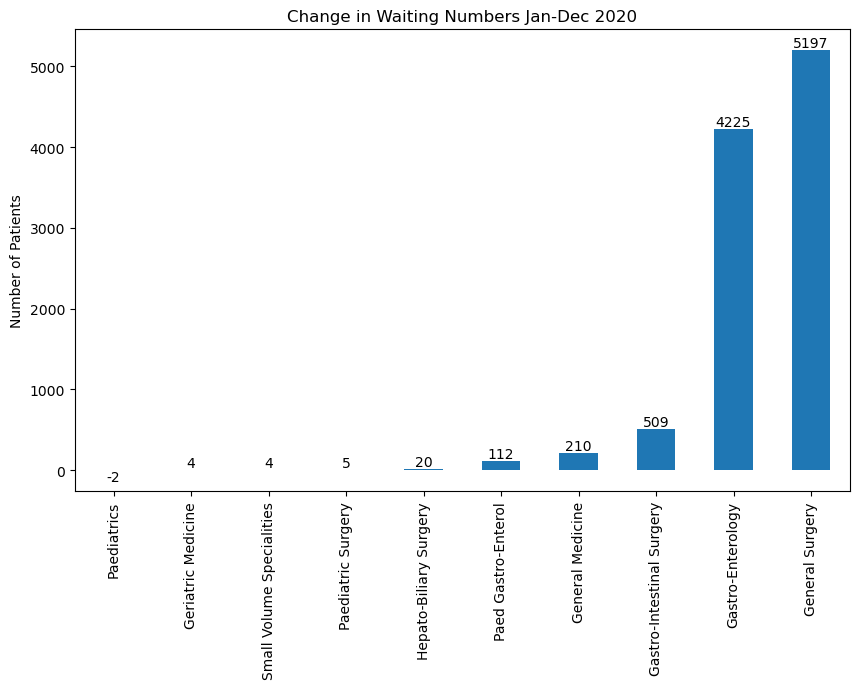

In [499]:
p3 = pivot_speciality.sort_values('jan-dec')

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

ax = p3['jan-dec'].plot(kind='bar')
ax.bar_label(ax.containers[0], label_type='edge')

# Set the title and axis labels
plt.title('Change in Waiting Numbers Jan-Dec 2020')
plt.xlabel('')
plt.ylabel('Number of Patients')


plt.show()

#### 2. Compare the waiting lists of any 3 hospitals over the 12 months


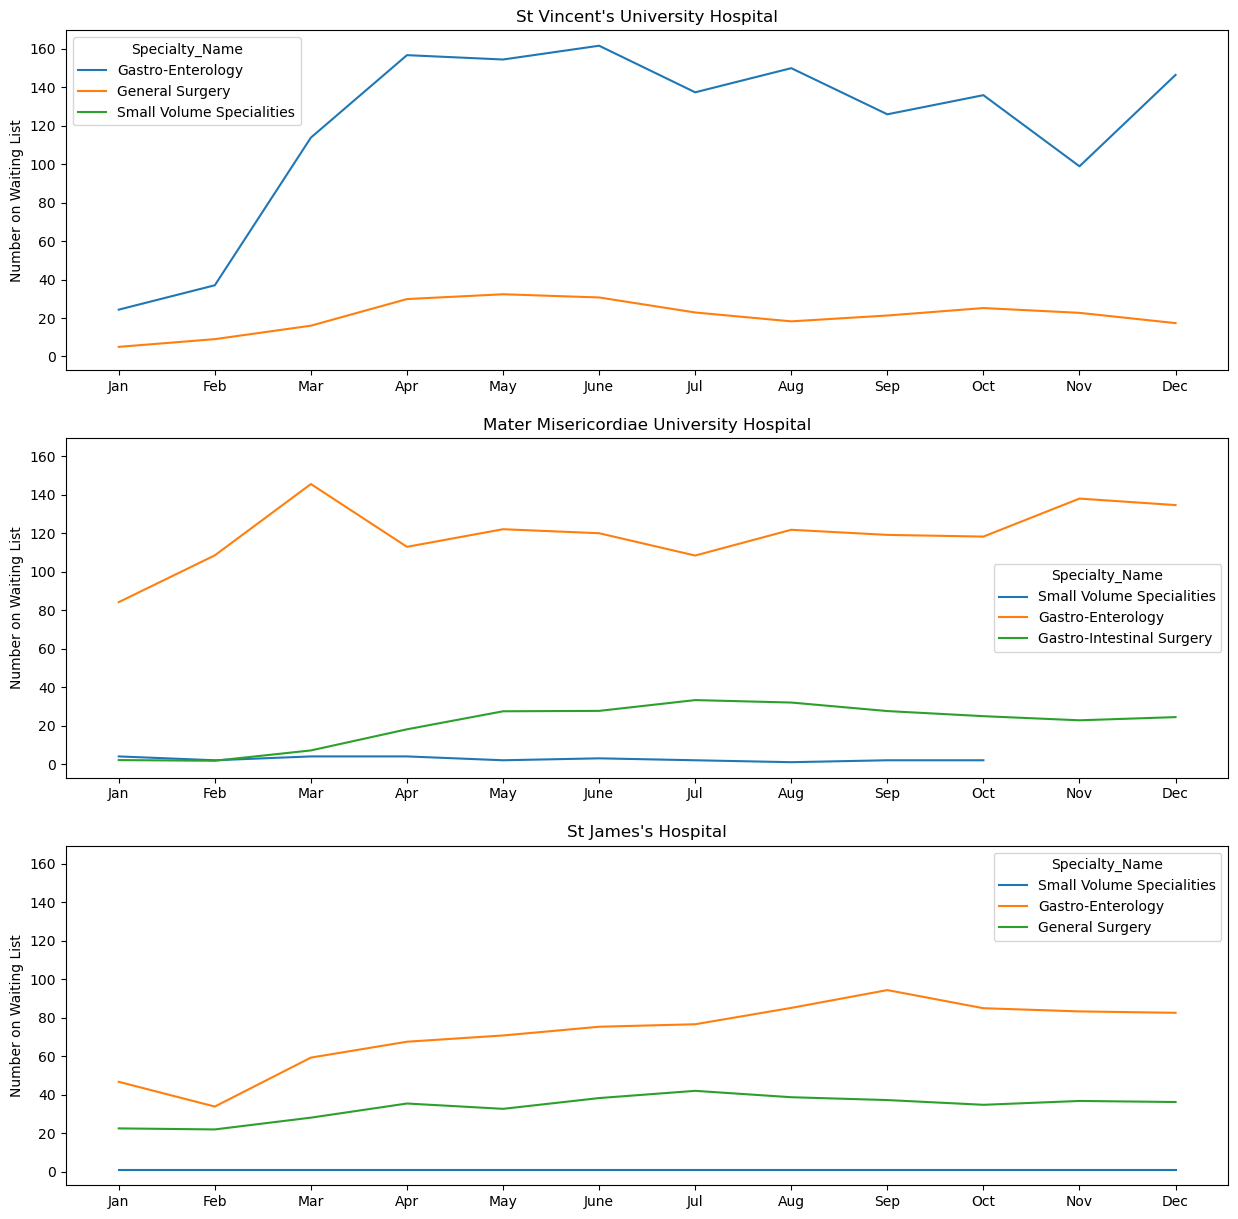

In [500]:
# subset 3 hospitals

svuh = yr_2020[yr_2020['Hospital_Name'] == "St. Vincent's University Hospital"]
mh = yr_2020[yr_2020['Hospital_Name'] == "Mater Misericordiae University Hospital"]
sjh = yr_2020[yr_2020['Hospital_Name'] == "St. James's Hospital"]

import seaborn as sns

fig, axes = plt.subplots(3, 1, sharey=True, figsize=(15,15))

sns.lineplot(ax=axes[0], data=svuh, x="Archive_Date", y="Total", hue='Specialty_Name', ci=None).set(title="St Vincent's University Hospital", xlabel='Date', ylabel='Number on Waiting List')
axes[0].set_title("St Vincent's University Hospital")
axes[0].set_xticks(['30/01/2020', '27/02/2020', '26/03/2020', '30/04/2020', '28/05/2020', '25/06/2020', '30/07/2020', '27/08/2020', '24/09/2020', '29/10/2020', '26/11/2020', '23/12/2020'])
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].set_xlabel("")

sns.lineplot(ax=axes[1], data=mh, x="Archive_Date", y="Total", hue='Specialty_Name', ci=None).set(title="St Vincent's University Hospital", xlabel='Date', ylabel='Number on Waiting List')
axes[1].set_title("Mater Misericordiae University Hospital")
axes[1].set_xticks(['30/01/2020', '27/02/2020', '26/03/2020', '30/04/2020', '28/05/2020', '25/06/2020', '30/07/2020', '27/08/2020', '24/09/2020', '29/10/2020', '26/11/2020', '23/12/2020'])
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].set_xlabel("")

sns.lineplot(ax=axes[2], data=sjh, x="Archive_Date", y="Total", hue='Specialty_Name', ci=None).set(title="St James's Hospital", xlabel='Date', ylabel='Number on Waiting List')
axes[2].set_title("St James's Hospital")
axes[2].set_xticks(['30/01/2020', '27/02/2020', '26/03/2020', '30/04/2020', '28/05/2020', '25/06/2020', '30/07/2020', '27/08/2020', '24/09/2020', '29/10/2020', '26/11/2020', '23/12/2020'])
axes[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[2].set_xlabel("")

plt.show()

#### 3. Create a dashboard to present the data clearly and concisely to the team in charge of waiting lists at a local hospital.

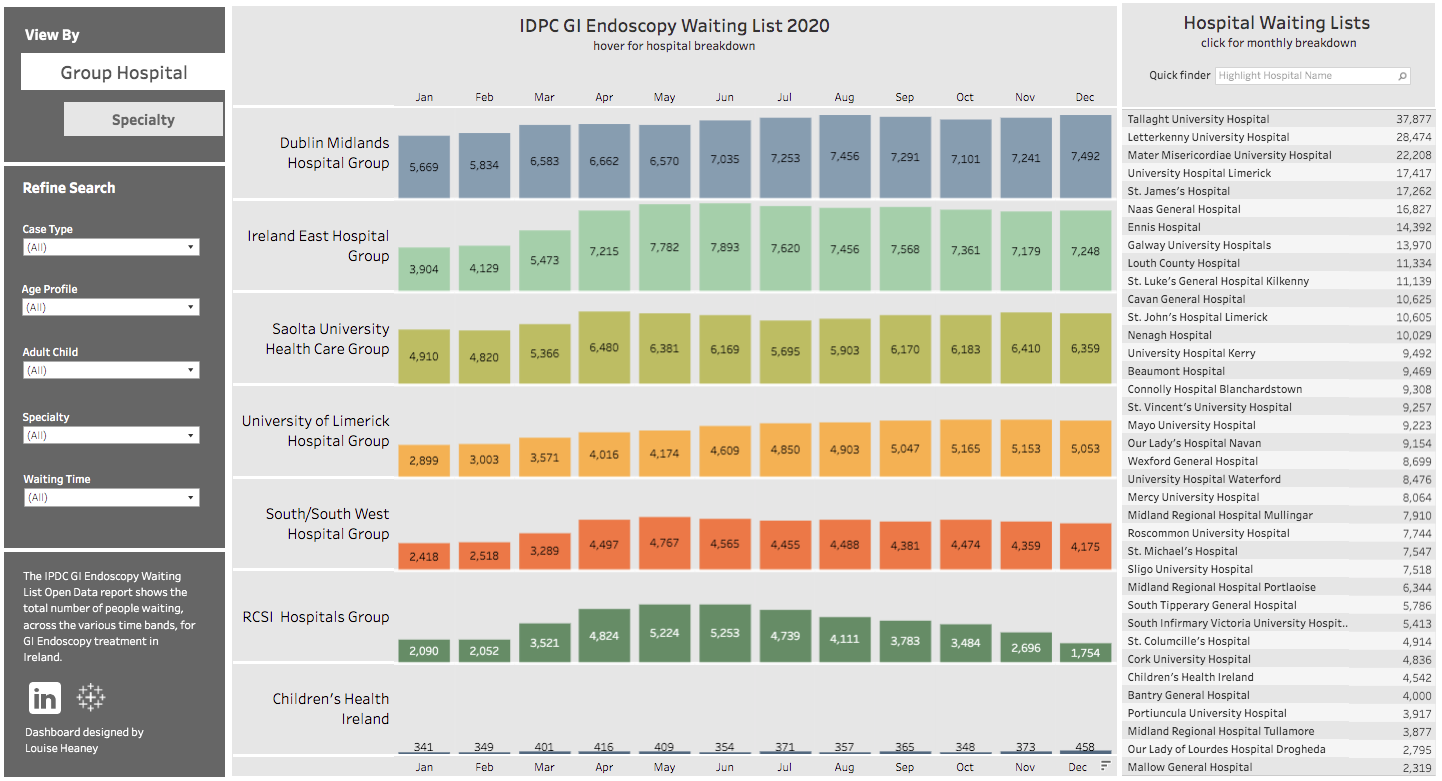

Visit the interactive dashboard here: https://public.tableau.com/app/profile/louise.heaney/viz/IPDCGIEndoscopyWaitingListOpenData/Dashboard1